In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib


print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
X_train = pd.read_csv('../heart_disease_data/split_data/X_train_scaled.csv')
X_test = pd.read_csv('../heart_disease_data/split_data/X_test_scaled.csv')
y_train = pd.read_csv('../heart_disease_data/split_data/y_train.csv')
y_test = pd.read_csv('../heart_disease_data/split_data/y_test.csv')


print("\nThis is the shape of Xtrain: ", X_train.shape)
print("\nThis is the shape of Xtest: ", X_test.shape)
print("\nThis is the shape of Ytrain: ", y_train.shape)
print("\nThis is the shape of Ytest: ", y_test.shape)


This is the shape of Xtrain:  (242, 15)

This is the shape of Xtest:  (61, 15)

This is the shape of Ytrain:  (242, 1)

This is the shape of Ytest:  (61, 1)


In [3]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_unknown,thal_fixed_defect,thal_reversible_defect
0,-2.838504,1.0,2,-0.125982,-0.864142,0.0,2,2.314470,0.0,-0.873573,1,0,True,False,False
1,0.241352,1.0,3,0.974653,-2.483637,1.0,0,1.021242,0.0,-0.704854,1,1,False,False,True
2,1.561291,1.0,1,1.524970,-0.241260,1.0,2,-0.851710,0.0,-0.789214,2,1,True,False,False
3,1.121311,0.0,3,1.524970,2.374848,0.0,2,0.040172,0.0,-0.198698,1,0,True,False,False
4,-0.308622,1.0,4,-1.336680,-0.262023,1.0,0,-0.138205,0.0,-0.789214,1,3,False,False,True


In [4]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_unknown,thal_fixed_defect,thal_reversible_defect
0,-0.198627,1.0,3,-0.125982,0.007893,1.0,2,1.021242,0.0,-0.873573,1,3,True,False,False
1,-0.088632,1.0,4,-1.226617,-0.822617,0.0,2,-1.877375,1.0,-0.873573,2,1,True,False,False
2,0.131357,1.0,4,-0.401140,0.070182,1.0,2,-0.271987,1.0,0.138740,2,1,True,False,False
3,0.351347,1.0,4,-1.776934,-0.241260,0.0,0,0.263142,0.0,-0.789214,1,1,False,False,True
4,-0.418617,0.0,4,-0.125982,1.232896,0.0,0,-0.361175,1.0,0.138740,2,0,False,False,True


In [5]:
y_train[:5]

,target_binary
0,0
1,0
2,0
3,0
4,0


In [6]:
y_test[:5]

,target_binary
0,0
1,1
2,1
3,1
4,1


In [7]:
pca = PCA()
pca.fit(X_train)



PCA()

In [8]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

n_components = None
for i, cumsum in enumerate(cumulative_variance):
    if cumsum >= 0.95:
        n_components = i + 1  
        break

print(f"Number of components for 95% variance: {n_components}")

Number of components for 95% variance: 11


In [9]:
# Final PCA transform
pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

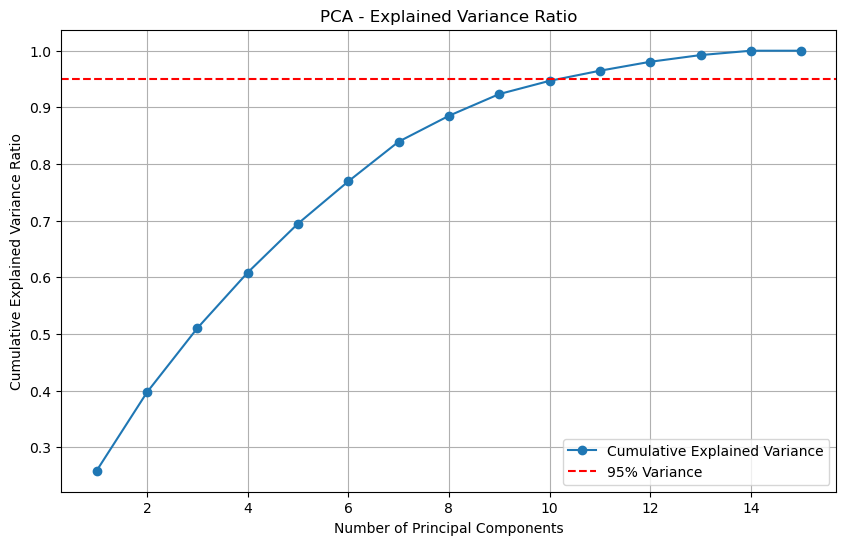

In [10]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', label='Cumulative Explained Variance')

plt.axhline(0.95, color='red', linestyle='--', label='95% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()





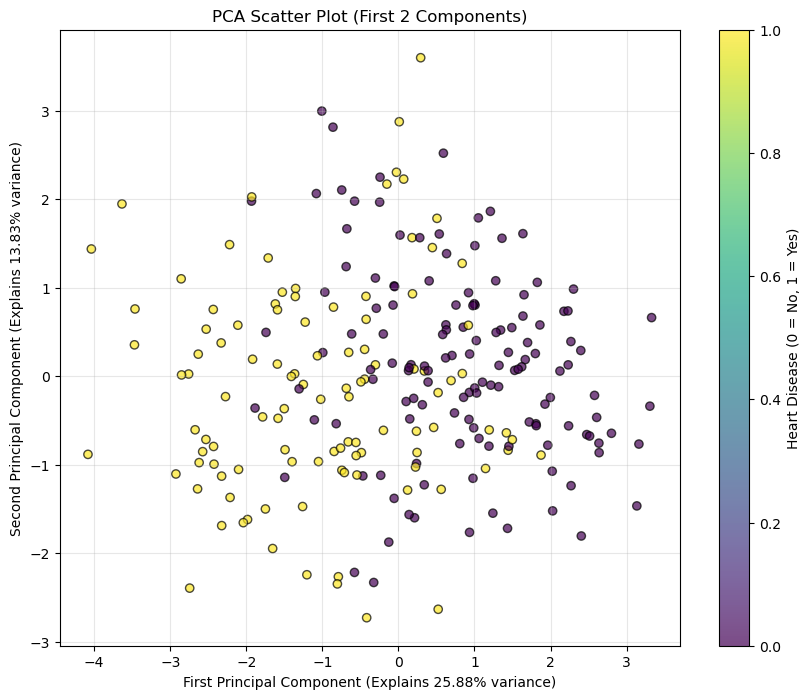

In [11]:
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1],
                      c=y_train.values.squeeze(), cmap='viridis', alpha=0.7, edgecolors='k')

plt.xlabel(f'First Principal Component (Explains {pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component (Explains {pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Scatter Plot (First 2 Components)')
plt.colorbar(scatter, label='Heart Disease (0 = No, 1 = Yes)')
plt.grid(True, alpha=0.3)
plt.show()